In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd

import json

import copy
import matplotlib as mpl

In [15]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]
single_anode_channel = int(json_file["single_anode_channel"])
number_tubes_json = len(json_file["tubes"])

#opening the file

dictionary_path = home_path+'processed_data/Dados BC1/'
file = open(dictionary_path+name_json+'_separate.pkl','rb')
results = pickle.load(file)
#Path to the channel reading mapping file
map_path = home_path+'processed_data/Dados BC1/mapping.txt'
pixel_map = np.loadtxt(map_path)

In [16]:
position=pixel_map[pixel_map!=0]

In [17]:
cell = 'C'
data = results["Data"+cell]["data"][0][:,(position.astype(int)-1)]
single_anode = results["Data"+cell]["data"][0][:,2]

In [18]:
pos=[]
for i in range(len(data.T)):
    if (data[:,i].max()>(data[:,i].mean()+0.15*data[:,i].mean())):
        pos.append(i+1)
pos=np.asarray(pos)

In [19]:
pos

array([ 7, 12, 13, 14, 15, 18, 19, 20, 21, 27, 28, 32, 33, 34, 35, 39, 41,
       42, 45, 46])

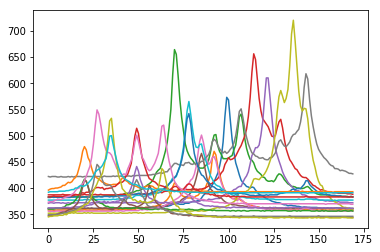

In [20]:
plt.plot(data[:,(pos-1)])
plt.show()

In [64]:
def image_plot(sources,single_anode):

    coeff=np.linalg.lstsq((sources.T),single_anode)[0]
    sums=0
    sums_normal=0
    for i in range(len(coeff)):
        sums=sums + coeff[i]*sources[i]
        sums_normal = sums_normal + sources[i]
        
    error = single_anode - sums

    
    print coeff
    plt.figure(figsize=(15,10))
    plt.plot(single_anode,label='Single-Anode PMT' )
    plt.plot(sums,label='Sum using Least Squares')
    plt.plot(error,label = 'error')
    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"
    plt.title(str(len(coeff))+' Sources :'+' Analysis Least Squares ', fontsize = 20)

    # hide tick and tick label of the big axes
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/sum data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   ######################################################################################################################
    fig, ax1 = plt.subplots(figsize=(15,10))

    color = 'tab:orange'
    ax1.set_xlabel('Triggers')
    ax1.set_ylabel('ADC Counts', color=color)
    ax1.plot(sums_normal, color=color,label = 'Sum')

    ax1.tick_params(axis='y', labelcolor=color)
    
    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('ADC Counts', color=color)  # we already handled the x-label with ax1
    ax2.plot(single_anode, color=color,label='Single-Anode PMT' )
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
   

    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/Wsum data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   


    plt.clf()


/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


[  2.37884559 -16.43180473   4.53443171   1.83643831   2.5765156
 -35.06273707  28.42265215   1.30246363  -0.90274876   5.31623167
  -2.96583712 -11.05286618   7.41555586   5.07290851  -7.24862572
  15.18372593   1.60721025   5.06030569   4.13884525  -8.04043249]


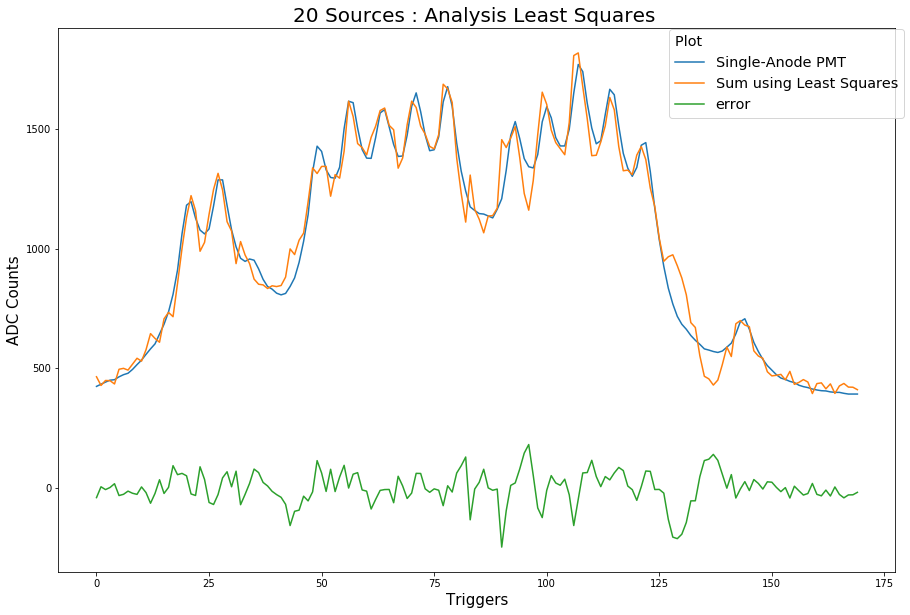

<Figure size 1080x720 with 0 Axes>

In [65]:
image_plot(data[:,(pos-1)].T,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


[  5.11352682   5.96351462   7.58786147  -7.66489978 -10.74108704
 -12.05852825   4.42820558 -11.72844521 -10.60510531   9.67299824
  12.09106675  -1.48093473   4.49242359   2.69057006   1.81367343
  -2.83460505 -10.64363762  -3.76261917   4.45860512   2.16404566
  -3.90772717  11.81207687   3.6490027  -17.46247714   2.59725546
  -6.97120627   6.07549963  -2.7971077   12.9829426    5.47107493
  -4.74080378 -12.82431585   9.03969846  -1.28708321   6.73241257
 -15.42496669   0.5765132  -21.75587274  15.84369201   2.05606346
   6.00755073  -4.97136528  -4.93822602  23.806644    -3.34595857
   6.63176426]


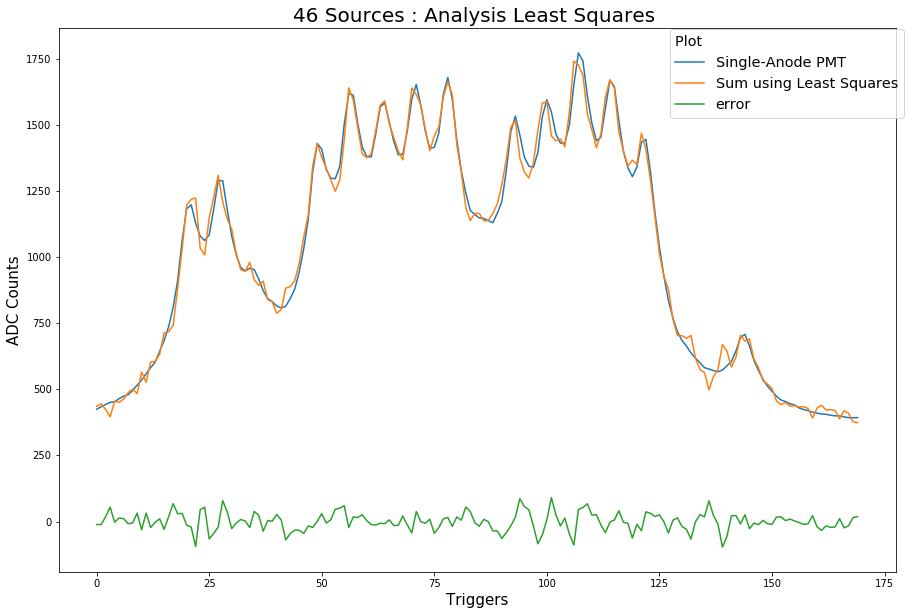

<Figure size 1080x720 with 0 Axes>

In [66]:
image_plot(data.T,single_anode)